<a href="https://colab.research.google.com/github/chacosa9/sumo-rl-main/blob/main/xml_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

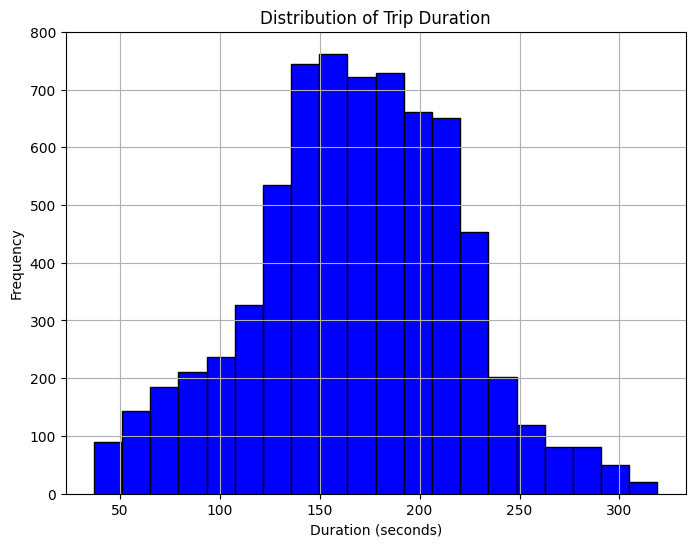

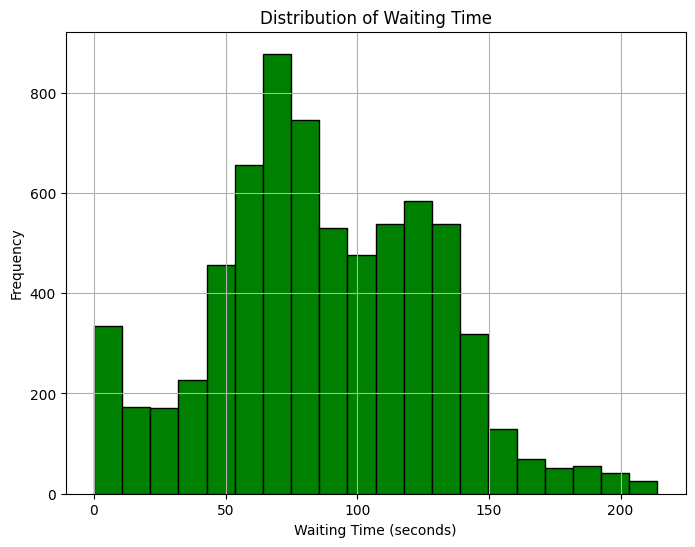

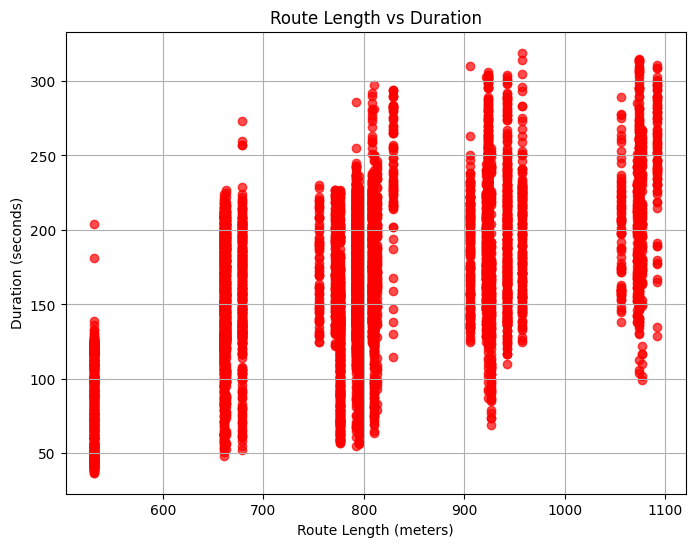

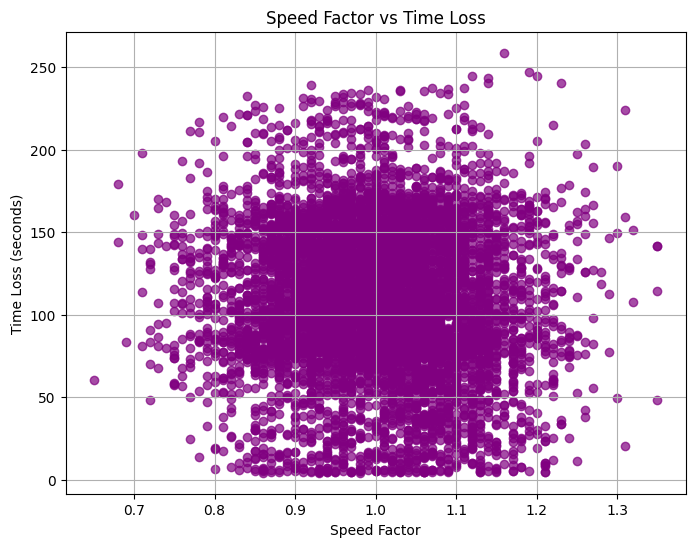

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Load and parse the tripinfo XML file
tripinfo_path = 'tripinfo.xml'  # Update the path if necessary
tree = ET.parse(tripinfo_path)
root = tree.getroot()

# Extract relevant trip information from the XML file
trip_data = []
for trip in root.findall('tripinfo'):
    trip_info = {
        'id': trip.get('id'),
        'depart': float(trip.get('depart')),
        'arrival': float(trip.get('arrival')),
        'duration': float(trip.get('duration')),
        'routeLength': float(trip.get('routeLength')),
        'waitingTime': float(trip.get('waitingTime')),
        'timeLoss': float(trip.get('timeLoss')),
        'speedFactor': float(trip.get('speedFactor'))
    }
    trip_data.append(trip_info)

# Create a DataFrame for analysis
df = pd.DataFrame(trip_data)

# Plot 1: Distribution of Trip Duration
plt.figure(figsize=(8, 6))
plt.hist(df['duration'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Distribution of Waiting Time
plt.figure(figsize=(8, 6))
plt.hist(df['waitingTime'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Waiting Time')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 3: Route Length vs Duration
plt.figure(figsize=(8, 6))
plt.scatter(df['routeLength'], df['duration'], color='red', alpha=0.7)
plt.title('Route Length vs Duration')
plt.xlabel('Route Length (meters)')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

# Plot 4: Speed Factor vs Time Loss
plt.figure(figsize=(8, 6))
plt.scatter(df['speedFactor'], df['timeLoss'], color='purple', alpha=0.7)
plt.title('Speed Factor vs Time Loss')
plt.xlabel('Speed Factor')
plt.ylabel('Time Loss (seconds)')
plt.grid(True)
plt.show()
